In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('dermatology_csv.csv')
data.head()

X = data.iloc[:,:34]
y = data.iloc[:,-1]

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy ='mean')
imputer = imputer.fit(X)
X = imputer.transform(X)
X = pd.DataFrame(X)

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 4)

In [6]:
from sklearn import svm

classifier = svm.SVC(kernel = 'linear',gamma = 'auto',C = 2)
classifier.fit(X_train,y_train)

y_predict = classifier.predict(X_test)

In [7]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       1.00      0.97      0.98        32
           2       0.91      0.91      0.91        23
           3       1.00      1.00      1.00        19
           4       0.86      0.92      0.89        13
           5       0.94      1.00      0.97        17
           6       1.00      0.83      0.91         6

    accuracy                           0.95       110
   macro avg       0.95      0.94      0.94       110
weighted avg       0.96      0.95      0.95       110



In [8]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)
cm

array([[31,  0,  0,  0,  1,  0],
       [ 0, 21,  0,  2,  0,  0],
       [ 0,  0, 19,  0,  0,  0],
       [ 0,  1,  0, 12,  0,  0],
       [ 0,  0,  0,  0, 17,  0],
       [ 0,  1,  0,  0,  0,  5]])

Text(69.0, 0.5, 'Truth')

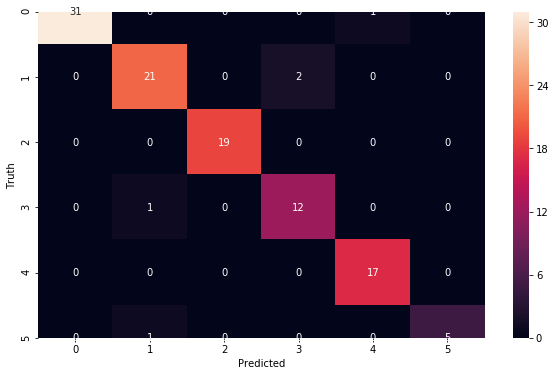

In [9]:
import seaborn as sn
plt.figure(figsize = (10,6))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')